In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv("/content/processed_cleveland.csv")

In [ ]:
df.head(10) #num->to predict

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

In [ ]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
import statistics
df["thal"] = df["thal"].replace(np.NaN,statistics.mode(df['thal']))

In [ ]:
df["ca"] = df["ca"].replace(np.NaN,statistics.mode(df['ca']))

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0.0,3.0,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df["num"] = df["num"].replace(2,1)
df["num"] = df["num"].replace(3,1)
df["num"] = df["num"].replace(4,1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '< 50% diameter narrowing Vs > 50% diameter narrowing')

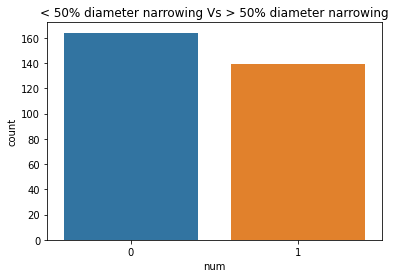

In [ ]:
import seaborn as sns
no_disease = sum(df.num==0)
disease = sum(df.num==1)

sns.countplot(df.num).set_title("< 50% diameter narrowing Vs > 50% diameter narrowing")

In [ ]:
df = df.drop(['sex'], axis = 1)
df = df.drop(['fbs'], axis = 1)
df = df.drop(['restecg'], axis = 1)
df = df.drop(['exang'], axis = 1)
df = df.drop(['oldpeak'],axis=1)

In [ ]:
df

,age,cp,trestbps,chol,thalach,slope,ca,thal,num
0,63,1,145,233,150,3,0.0,6.0,0
1,67,4,160,286,108,2,3.0,3.0,1
2,67,4,120,229,129,2,2.0,7.0,1
3,37,3,130,250,187,3,0.0,3.0,0
4,41,2,130,204,172,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,132,2,0.0,7.0,1
299,68,4,144,193,141,2,2.0,7.0,1
300,57,4,130,131,115,2,1.0,7.0,1
301,57,2,130,236,174,2,1.0,3.0,1


In [ ]:
x = df.iloc[:,0:8].values
y = df.iloc[:,8].values


In [ ]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(212, 8)
(212,)
(91, 8)


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
model = LR()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
df

,age,cp,trestbps,chol,thalach,slope,ca,thal,num
0,63,1,145,233,150,3,0.0,6.0,0
1,67,4,160,286,108,2,3.0,3.0,1
2,67,4,120,229,129,2,2.0,7.0,1
3,37,3,130,250,187,3,0.0,3.0,0
4,41,2,130,204,172,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,132,2,0.0,7.0,1
299,68,4,144,193,141,2,2.0,7.0,1
300,57,4,130,131,115,2,1.0,7.0,1
301,57,2,130,236,174,2,1.0,3.0,1


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.8461538461538461

In [ ]:
confusion_matrix(y_pred,y_test)

array([[44, 11],
       [ 3, 33]])

In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        47
           1       0.92      0.75      0.83        44

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91

